Take synthetic rho data and attempt outlier detection with one other type of a synthetic lightcurve; sine, flat, box function, inverted rho etc (an obvious outlier).

Sine wave results generated by synthetic_classes.py:

no. clusters:  150 segment length:  10
Mean rho error: 	 193.25615050380583 Max rho error:  385.1753621481247


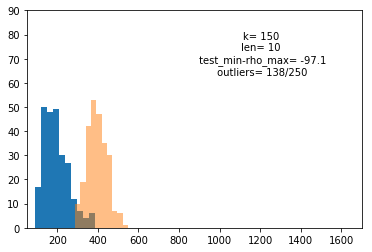

Mean test error: 	 395.7484855368144
Min test-max rho error:  -97.08565927654485
no. misclassified observations:  112

no. clusters:  150 segment length:  20
Mean rho error: 	 234.62346069774108 Max rho error:  453.63884559597375


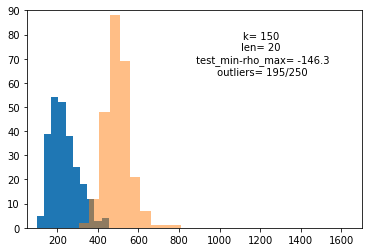

Mean test error: 	 498.8567863413824
Min test-max rho error:  -146.32424984799087
no. misclassified observations:  55

no. clusters:  150 segment length:  30
Mean rho error: 	 275.50381193060105 Max rho error:  528.0518492099513


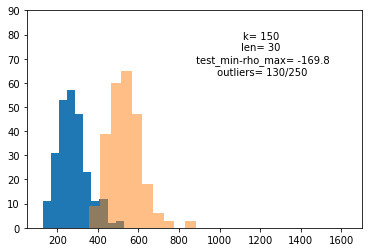

Mean test error: 	 534.5266612603036
Min test-max rho error:  -169.79601617813466
no. misclassified observations:  120

no. clusters:  150 segment length:  40
Mean rho error: 	 314.48624430004566 Max rho error:  626.4093196376944


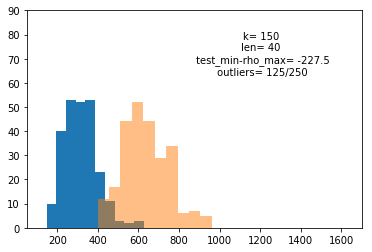

Mean test error: 	 635.4889784074514
Min test-max rho error:  -227.53041051153036
no. misclassified observations:  125

no. clusters:  200 segment length:  10
Mean rho error: 	 186.19308838089486 Max rho error:  366.73051558185665


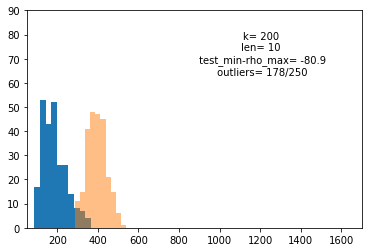

Mean test error: 	 394.4030088024848
Min test-max rho error:  -80.88259083591112
no. misclassified observations:  72

no. clusters:  200 segment length:  20
Mean rho error: 	 223.48071860671257 Max rho error:  409.8278751298711


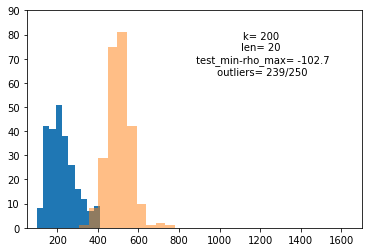

Mean test error: 	 504.07739356649637
Min test-max rho error:  -102.65031685600655
no. misclassified observations:  11

no. clusters:  200 segment length:  30
Mean rho error: 	 261.4145209362561 Max rho error:  531.5301152112455


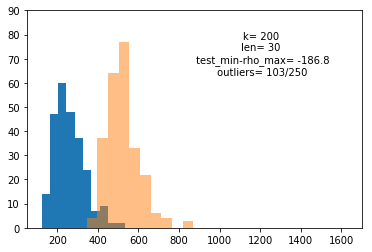

Mean test error: 	 523.4746792276202
Min test-max rho error:  -186.77113187976
no. misclassified observations:  147

no. clusters:  200 segment length:  40
Mean rho error: 	 302.2164017335051 Max rho error:  610.5984574715819


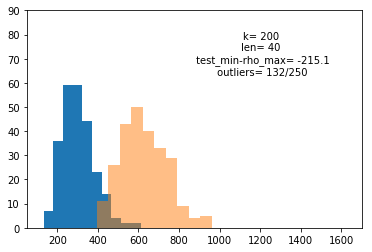

Mean test error: 	 628.0597703816545
Min test-max rho error:  -215.07244785038807
no. misclassified observations:  118

no. clusters:  250 segment length:  10
Mean rho error: 	 181.83928153205088 Max rho error:  376.71986641370086


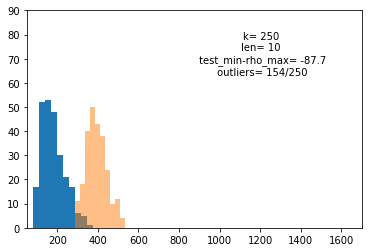

Mean test error: 	 394.7295041328516
Min test-max rho error:  -87.67398500452026
no. misclassified observations:  96

no. clusters:  250 segment length:  20
Mean rho error: 	 220.50501017648642 Max rho error:  414.80881750602884


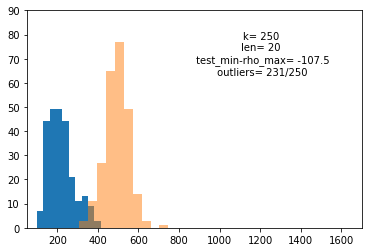

Mean test error: 	 493.32351891504834
Min test-max rho error:  -107.51540307728749
no. misclassified observations:  19

no. clusters:  250 segment length:  30
Mean rho error: 	 254.79759062021708 Max rho error:  529.328058807083


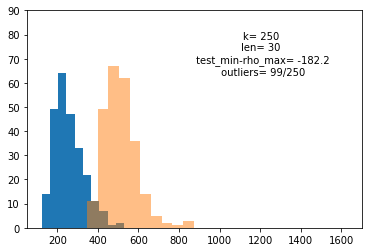

Mean test error: 	 513.935851878777
Min test-max rho error:  -182.17142292824508
no. misclassified observations:  151

no. clusters:  250 segment length:  40
Mean rho error: 	 288.0517767827215 Max rho error:  588.6324997320123


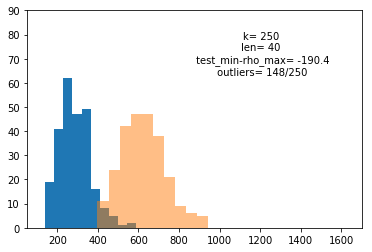

Mean test error: 	 623.4626341652859
Min test-max rho error:  -190.35696244182725
no. misclassified observations:  102



In [133]:
#sine waves
results=np.loadtxt("valid_results_20190510_sine.csv", dtype=float, delimiter=",")
k_clusters=[150, 200, 250]
seg_lens=[10, 20, 30, 40]
for k_id, k_cluster in enumerate(k_clusters):
    for len_id, seg_len in enumerate(seg_lens):
        print("no. clusters: ", k_cluster, "segment length: ", seg_len)
        train=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==0)]
        max_rho=np.max(train[:,-1])
        print("Mean rho error: \t", np.mean(train[:,-1]), "Max rho error: ", max_rho)
        test=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==1)]
        min_test=np.min(test[:,-1])
        counter=0
        for t in test[:,-1]:
            if t<max_rho:
                counter+=1
        f = plt.figure()
        ax = f.add_subplot(111)
        plt.hist(train[:,-1])
        plt.hist(test[:,-1],alpha=0.5)
        plt.xlim([50,1700])
        plt.ylim([0,90])
        plt.text(0.7,0.8,"k= {}\nlen= {}\n test_min-rho_max= {}\n outliers= {}/250".format(k_cluster, seg_len, round(min_test-max_rho,1), 250-counter),
                 ha='center', va='center', transform=ax.transAxes)
        plt.show()
        
        print("Mean test error: \t", np.mean(test[:,-1]))
        print("Min test-max rho error: ", min_test-max_rho)
        print("no. misclassified observations: ", counter)
        
        print()

In [171]:
results=np.loadtxt("results/valid_results_20190510_sine.csv", dtype=float, delimiter=",")
k_clusters=[150, 200, 250]
seg_lens=[10, 20, 30, 40]
worst_rho=[]
best_test=[]
for k_id, k_cluster in enumerate(k_clusters):
    for len_id, seg_len in enumerate(seg_lens):
        print("no. clusters: ", k_cluster, "segment length: ", seg_len)
        train=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==0)]
        max_rho=train[(train[:,-1]==np.max(train[:,-1]))][0]
        worst_rho.append(max_rho[3])
        #print("Mean rho error: \t", np.mean(train[:,-1]), "Max rho error: ", max_rho)
        test=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==1)]
        min_test=test[(test[:,-1]==np.min(test[:,-1]))][0]
        best_test.append(min_test[3])

no. clusters:  150 segment length:  10
no. clusters:  150 segment length:  20
no. clusters:  150 segment length:  30
no. clusters:  150 segment length:  40
no. clusters:  200 segment length:  10
no. clusters:  200 segment length:  20
no. clusters:  200 segment length:  30
no. clusters:  200 segment length:  40
no. clusters:  250 segment length:  10
no. clusters:  250 segment length:  20
no. clusters:  250 segment length:  30
no. clusters:  250 segment length:  40


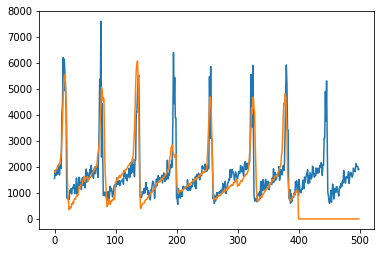

745.4705731821161


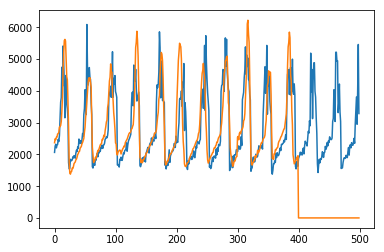

840.0877107211973


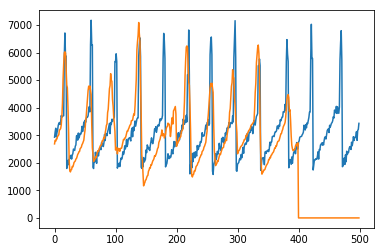

1054.3710758923191


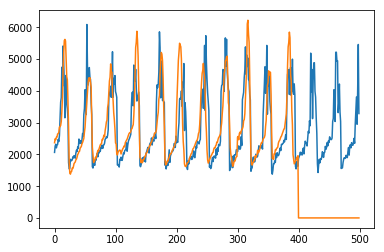

840.0877107211973


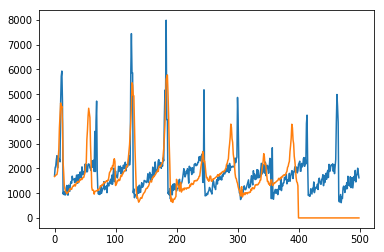

841.8138154039939


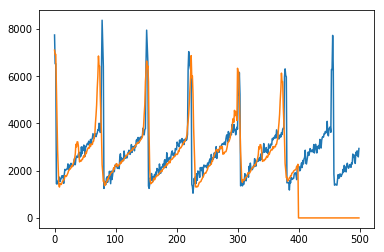

881.155587411444


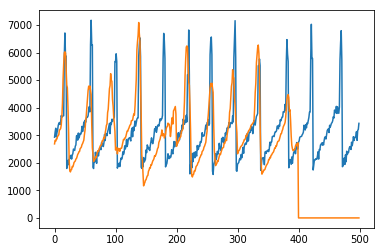

1054.3710758923191


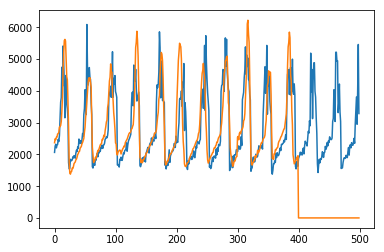

840.0877107211973


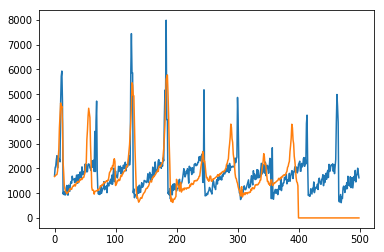

841.8138154039939


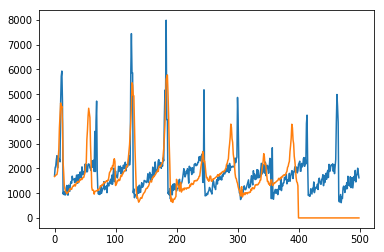

841.8138154039939


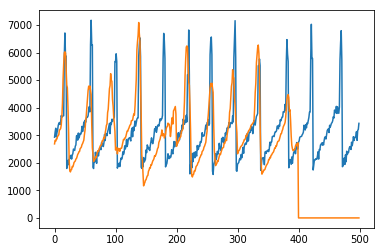

1054.3710758923191


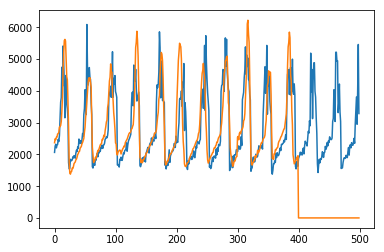

840.0877107211973


In [182]:
for rho in worst_rho:
    rho=rho_valid[int(rho)]
    seg_len=100
    valid_segments= sc.segmentation(rho, seg_len, seg_len , time_stamps=False)
    reco = sc.reconstruct(valid_segments, rho, cluster, rel_offset=False, seg_slide=seg_len)
    error=np.sqrt(np.mean((rho[seg_len:-seg_len]-reco[seg_len:-seg_len])**2))
    plt.plot(rho)
    plt.plot(reco)
    plt.show()
    print(error)

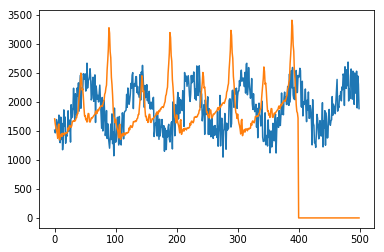

566.6417208537422


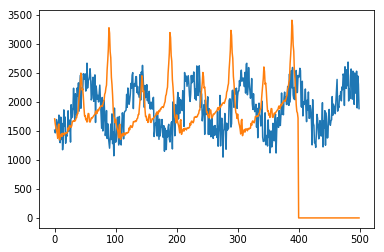

566.6417208537422


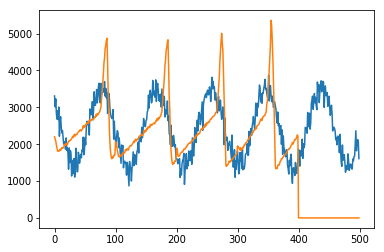

699.682541858134


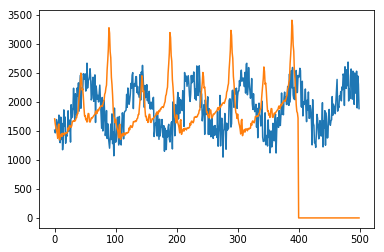

566.6417208537422


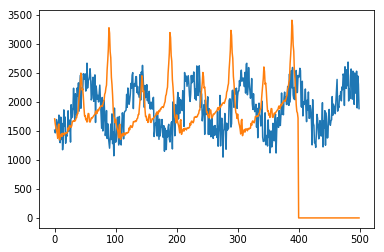

566.6417208537422


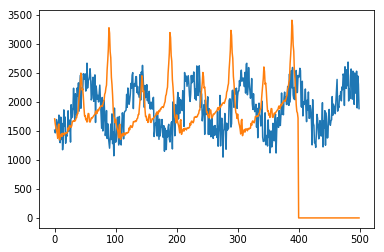

566.6417208537422


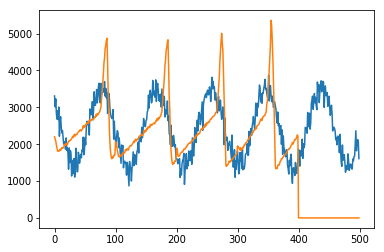

699.682541858134


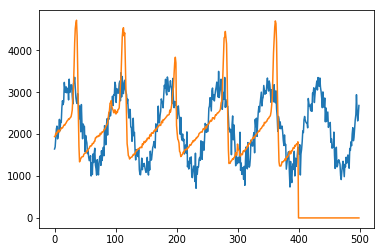

644.4414685920461


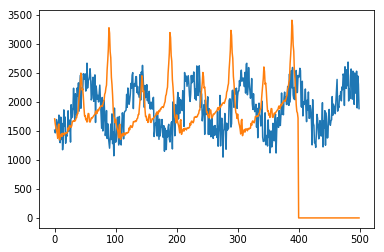

566.6417208537422


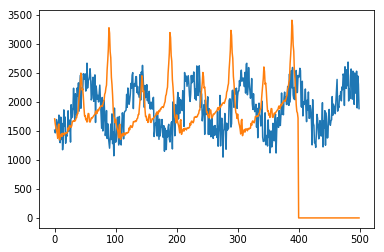

566.6417208537422


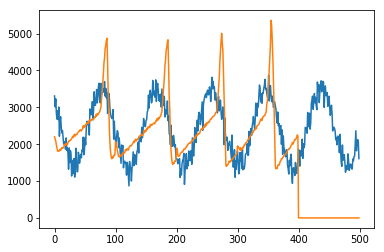

699.682541858134


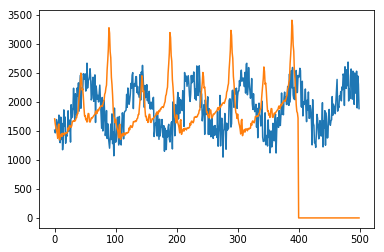

566.6417208537422


In [183]:
for rho in best_test:
    rho=sines[int(rho)]
    seg_len=100
    valid_segments= sc.segmentation(rho, seg_len, seg_len , time_stamps=False)
    reco = sc.reconstruct(valid_segments, rho, cluster, rel_offset=False, seg_slide=seg_len)
    error=np.sqrt(np.mean((rho[seg_len:-seg_len]-reco[seg_len:-seg_len])**2))
    plt.plot(rho)
    plt.plot(reco)
    plt.show()
    print(error)